### Description
This project explores a housing market dataset to understand the key factors that influence property prices. Through data cleaning, normalization, and visualization, it examines how features such as area, furnishing status, and amenities relate to price variations, providing insights for real estate valuation and investment.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# check data type of coulmns
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# check for missing values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# Normalisation
df['price_norm'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df['area_norm'] = (df['area'] - df['area'].min()) / (df['area'].max() - df['area'].min())

In [ ]:
price_bins = [0, 3000000, 7000000, df['price'].max()]
price_labels = ['Low', 'Medium', 'High']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

In [ ]:
# average house price
avg_house_price = df['price'].mean()
print(avg_house_price.round(2))


4766729.25


In [ ]:
# how many housed has air_0conditioning
num_houses_with_air_conditioning = df[df['airconditioning'] == 'yes'].shape[0]
print(num_houses_with_air_conditioning)

172


In [ ]:
# most common furnishing status
most_common_furnishing = df['furnishingstatus'].value_counts().idxmax()
# furnishing_mode = df['furnishingstatus'].mode()[0]
print(most_common_furnishing)

semi-furnished


In [ ]:
# average price per furnsihing statud
avg_price_per_furnishing_status = df.groupby('furnishingstatus')['price'].mean()
print(avg_price_per_furnishing_status)

furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64


In [ ]:
price_distribution = df['price_category'].value_counts()
print(price_distribution)

price_category
Medium    410
Low        71
High       64
Name: count, dtype: int64


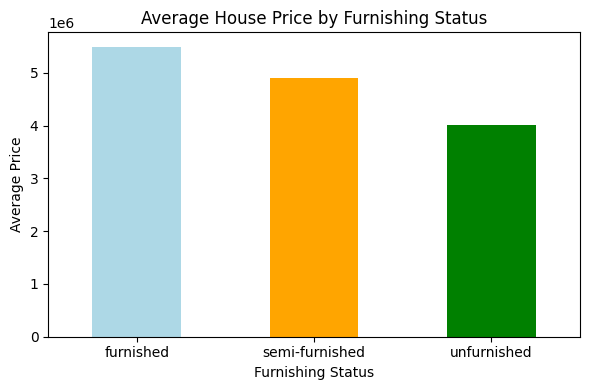

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
avg_price_per_furnishing_status.plot(kind='bar', color=['lightblue', 'orange', 'green'])
plt.title("Average House Price by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

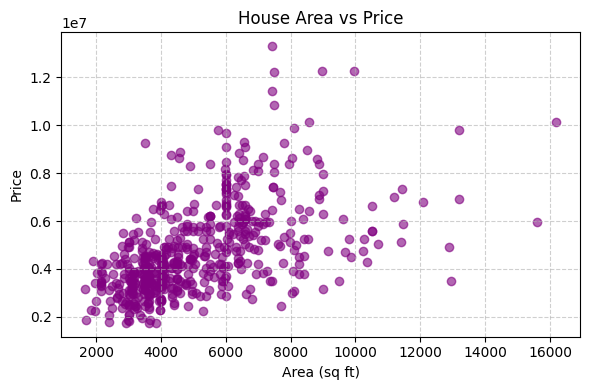

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['area'], df['price'], alpha=0.6, color='purple')
plt.title("House Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()